<a href="https://colab.research.google.com/github/Sumathi2007/Sumathi2007/blob/main/customer_csv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

⚠️ customers.csv not found — creating a sample dataset instead.
✅ Sample dataset created as 'customers.csv'

--- Dataset Preview ---
   CustomerID  Age  Annual_Income  Spending_Score
0           1   56          73053              58
1           2   69          36959              67
2           3   46          20530              46
3           4   32         109856              24
4           5   60          18748              32

✅ Data scaled successfully!


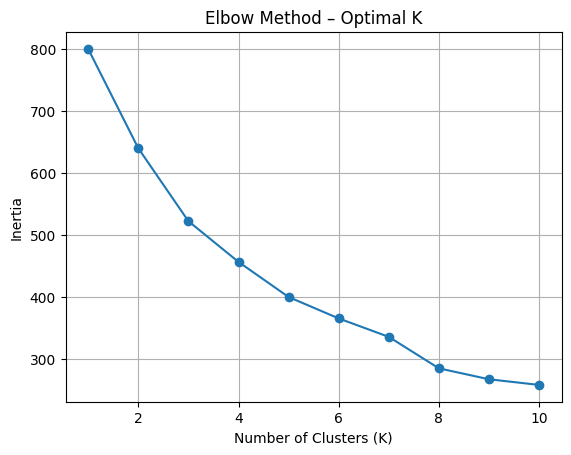


✅ Clustering Completed!
   CustomerID  Age  Annual_Income  Spending_Score  Cluster
0           1   56          73053              58        2
1           2   69          36959              67        2
2           3   46          20530              46        2
3           4   32         109856              24        0
4           5   60          18748              32        2


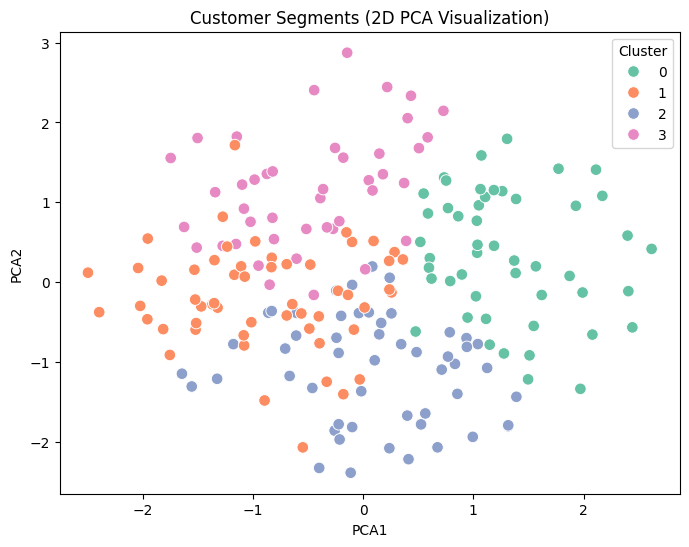


--- Cluster Summary ---
               Age  Annual_Income  Spending_Score
Cluster                                          
0        32.240000   89649.820000       66.900000
1        44.563636   59381.618182       25.000000
2        52.961538   64577.134615       33.596154
3        43.441860   47651.581395       79.186047


In [11]:
# ================================================
# 🧠 Dnyx Internship (AI) – November 2025
# Task 2: Clustering – Customer Segmentation
# ================================================

# ----------------------------------------
# Step 1: Import Libraries
# ----------------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# ----------------------------------------
# Step 2: Load or Create Dataset
# ----------------------------------------
# Try to load the given dataset; if missing, create a sample one
try:
    df = pd.read_csv("customers.csv")
    print("✅ Loaded attached dataset (customers.csv)")
except FileNotFoundError:
    print("⚠️ customers.csv not found — creating a sample dataset instead.")
    np.random.seed(42)
    df = pd.DataFrame({
        'CustomerID': range(1, 201),
        'Age': np.random.randint(18, 70, 200),
        'Annual_Income': np.random.randint(15000, 120000, 200),
        'Spending_Score': np.random.randint(1, 100, 200)
    })
    df.to_csv("customers.csv", index=False)
    print("✅ Sample dataset created as 'customers.csv'")

print("\n--- Dataset Preview ---")
print(df.head())

# ----------------------------------------
# Step 3: Data Cleaning & Preprocessing
# ----------------------------------------
df = df.dropna()
df = df.select_dtypes(include=['number'])  # keep numeric columns

# Feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

print("\n✅ Data scaled successfully!")

# ----------------------------------------
# Step 4: Determine Optimal Number of Clusters (Elbow Method)
# ----------------------------------------
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(scaled_data)
    inertia.append(km.inertia_)

plt.plot(K, inertia, marker='o')
plt.title('Elbow Method – Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

# ----------------------------------------
# Step 5: Apply K-Means Clustering
# ----------------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

print("\n✅ Clustering Completed!")
print(df.head())

# ----------------------------------------
# Step 6: Visualize Clusters in 2D using PCA
# ----------------------------------------
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', palette='Set2', data=df, s=70
)
plt.title('Customer Segments (2D PCA Visualization)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend(title='Cluster')
plt.show()

# ----------------------------------------
# Step 7: Analyze Cluster Characteristics
# ----------------------------------------
cluster_summary = df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
print("\n--- Cluster Summary ---")
print(cluster_summary)
